In [1]:
%matplotlib inline
from marketdata import *
from model import *
from trading import * 
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data 


In [79]:
FundAUM=30e6
mkts=get_market_list()
df=pd.DataFrame()
for m in mkts:
    try:
        df[m]=get_timeseries(m)
    except:
        print m
df=df.fillna(0)

# Charts for email to be sent once data is gathered and signals calculated

In [24]:
curr_px=get_most_liquid_price(mkts)

In [122]:
sh=15
lg=80
pos=tsmom_daily(df[mkts],sh)
pnl_short=calc_pnl_wc(pos,df[mkts])
pos=tsmom_daily(df[mkts],lg)
pnl_long=calc_pnl_wc(pos,df[mkts])
combined_pnl=(pnl_short*.5+pnl_long*.5)
scaling_factor=calc_scaling_factor(combined_pnl)
s_short=tsmom_daily_signal(df,sh)
s_long=tsmom_daily_signal(df,lg)
s_combined = (s_short*.60+s_long*.40)
lots=calc_position(s_combined,FundAUM,scaling_factor,curr_px)

In [123]:
lots=calc_positions_two_lookbacks(10,80,mkts,df,FundAUM).dropna(how='all')

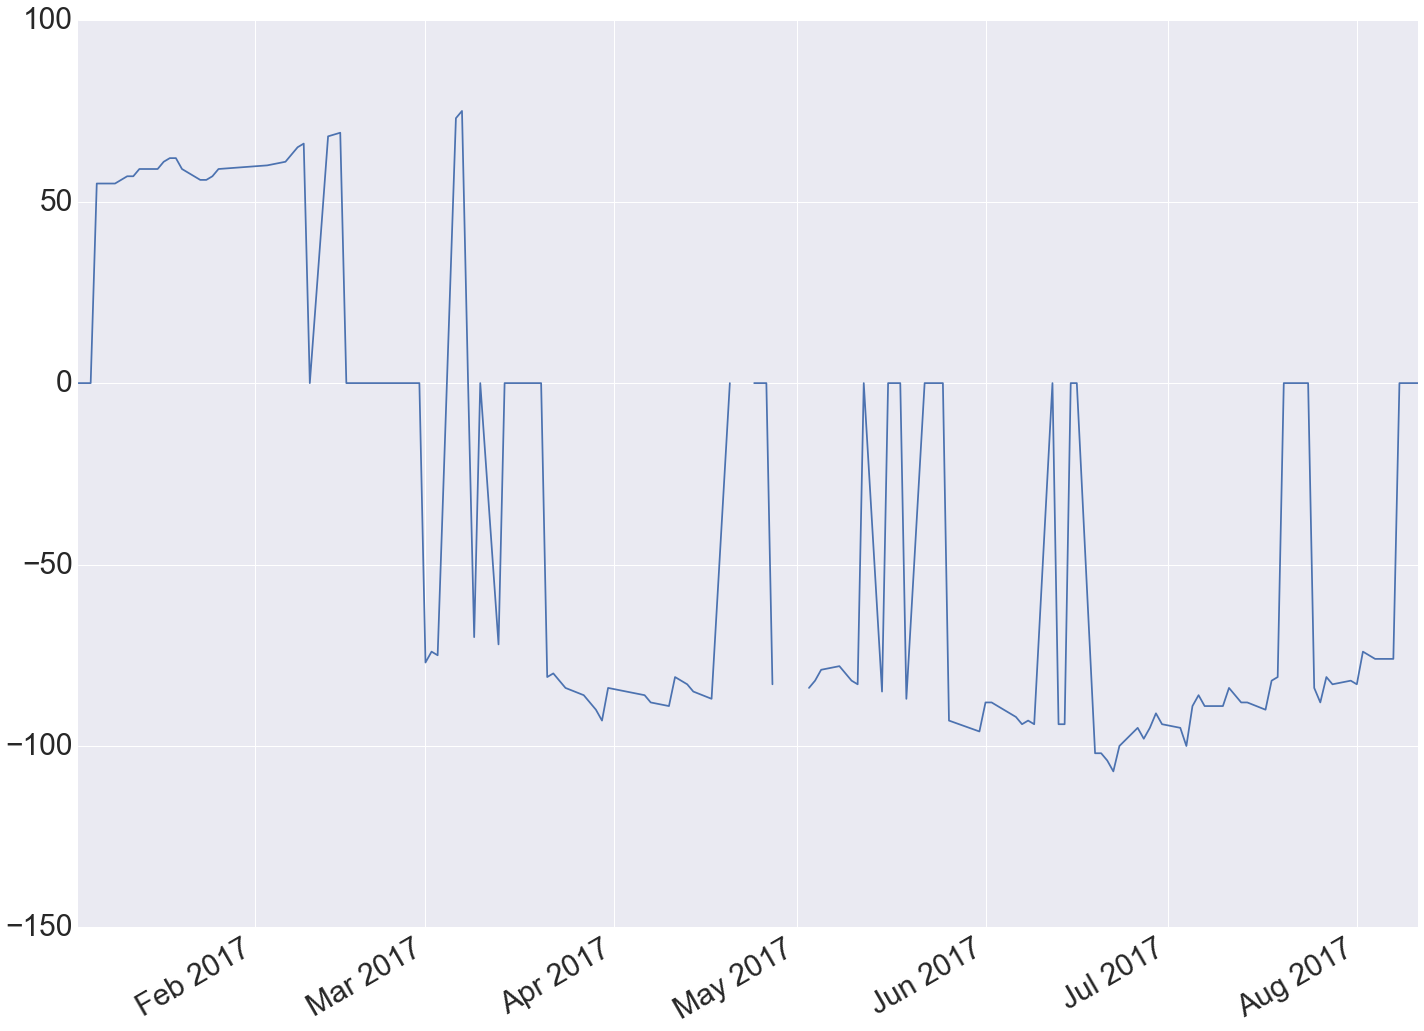

In [118]:
lots.SR['2017'].plot()

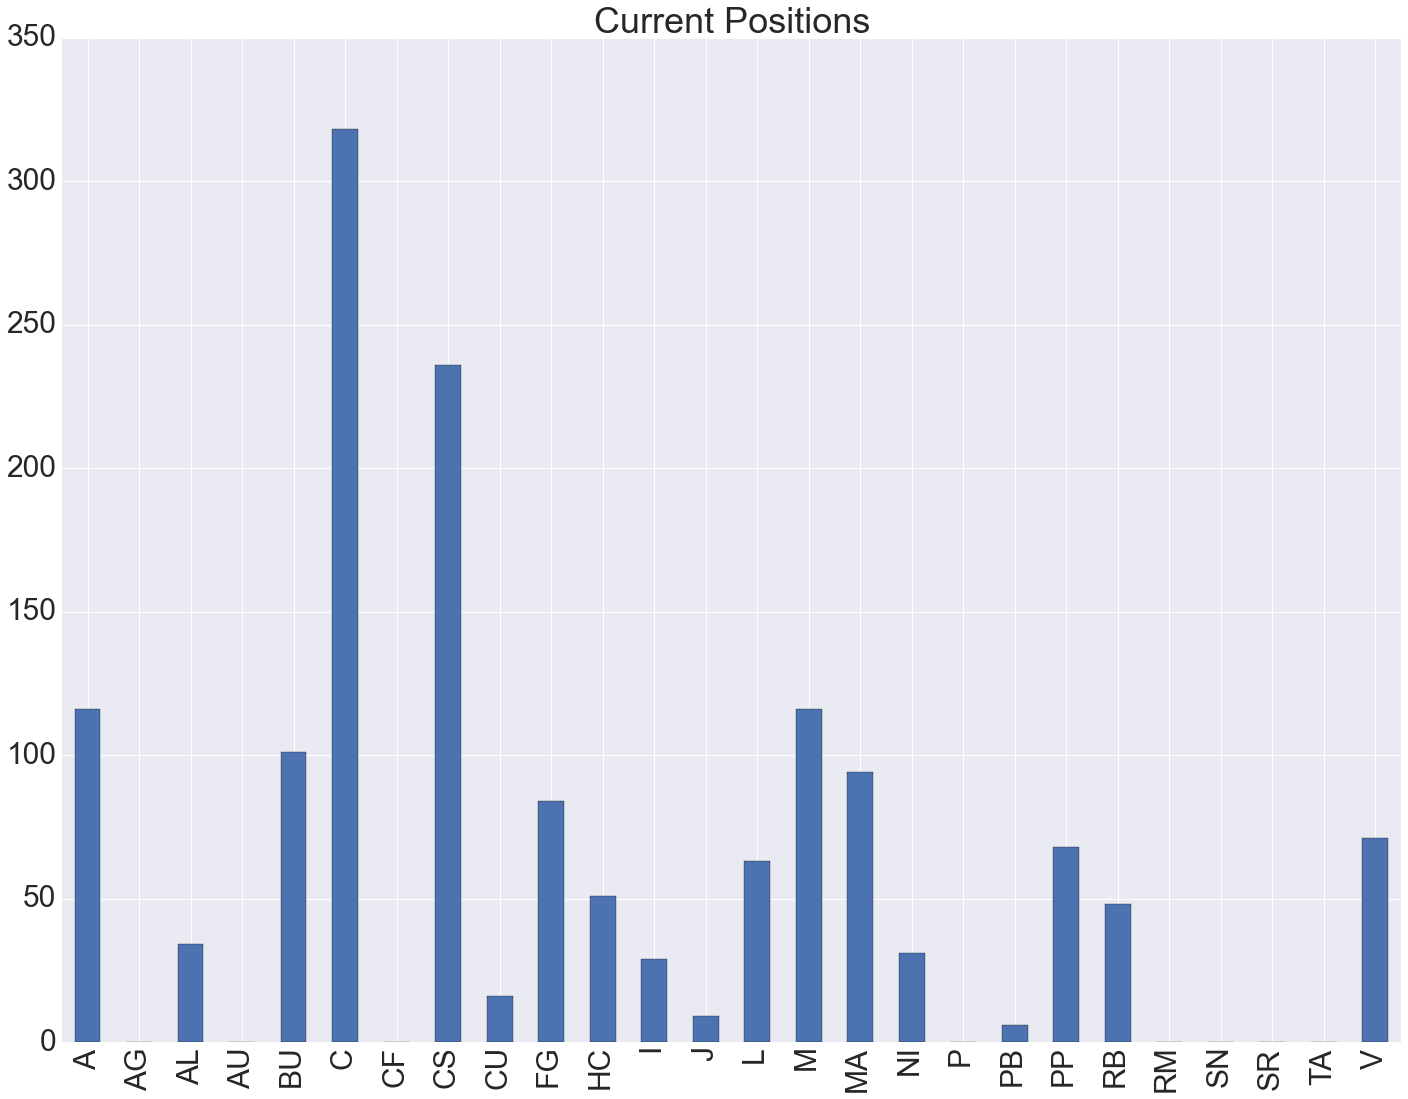

In [117]:
lots.ix[lots.index[-1]].plot(kind='bar',title='Current Positions')

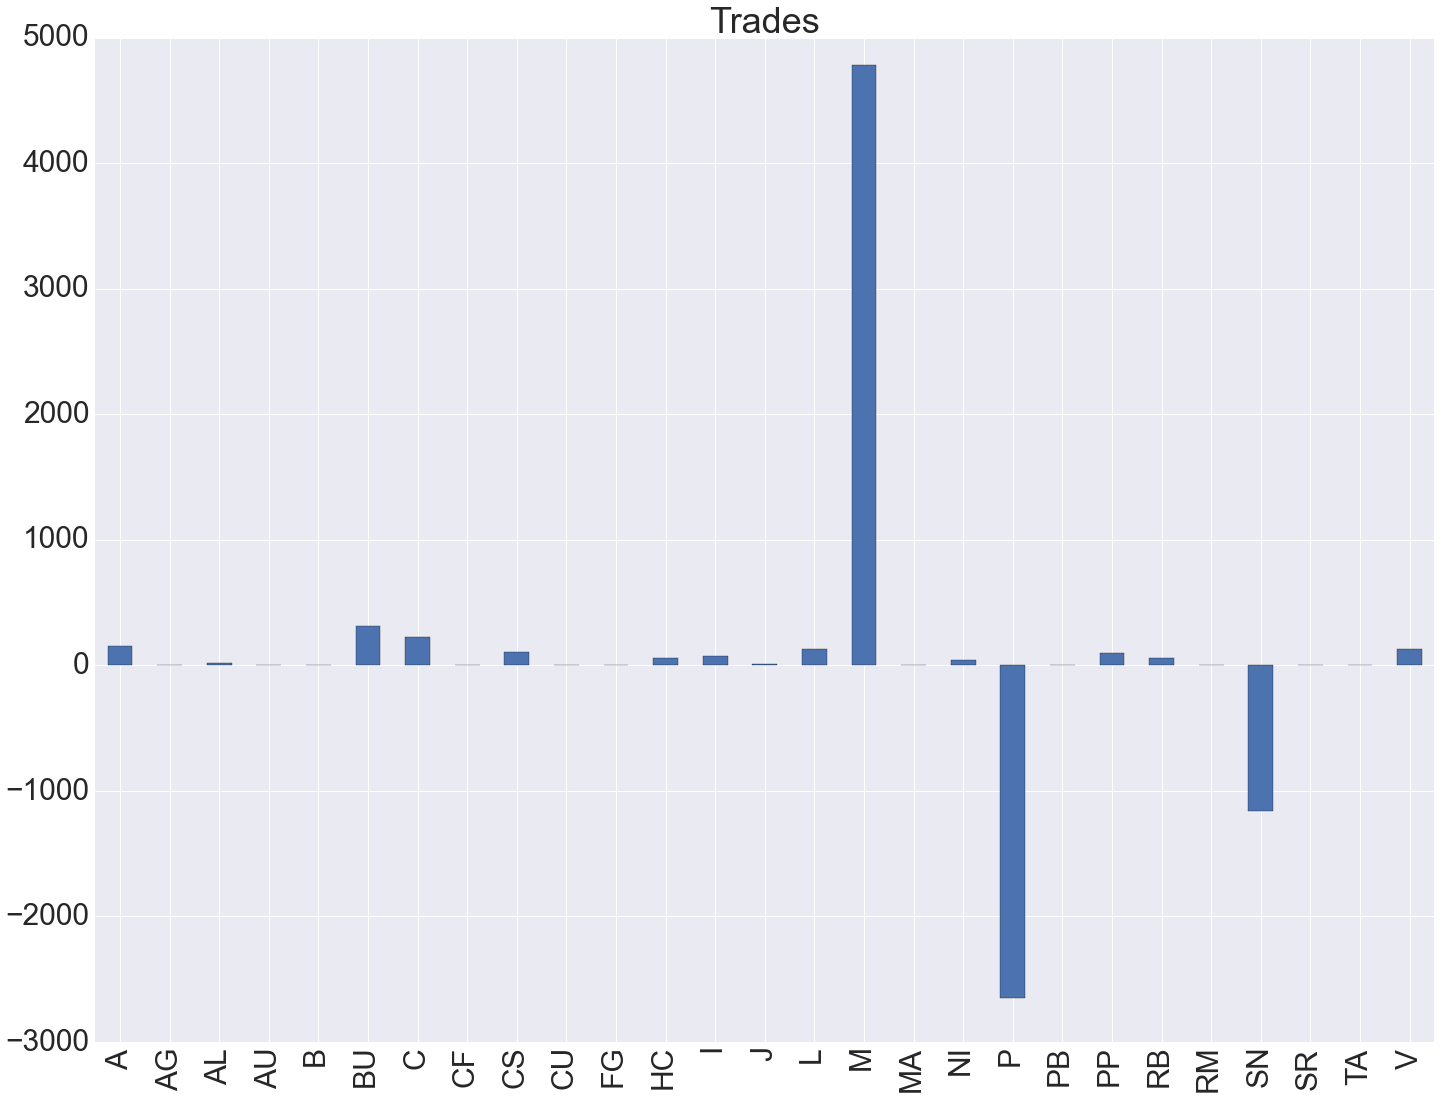

In [6]:
lots.diff().ix[lots.index[-1]].plot(kind='bar',title='Trades')

In [7]:
curr_px=get_most_liquid_price(mkts)
PNL = calc_pnl_position_wc(lots,df,curr_px)

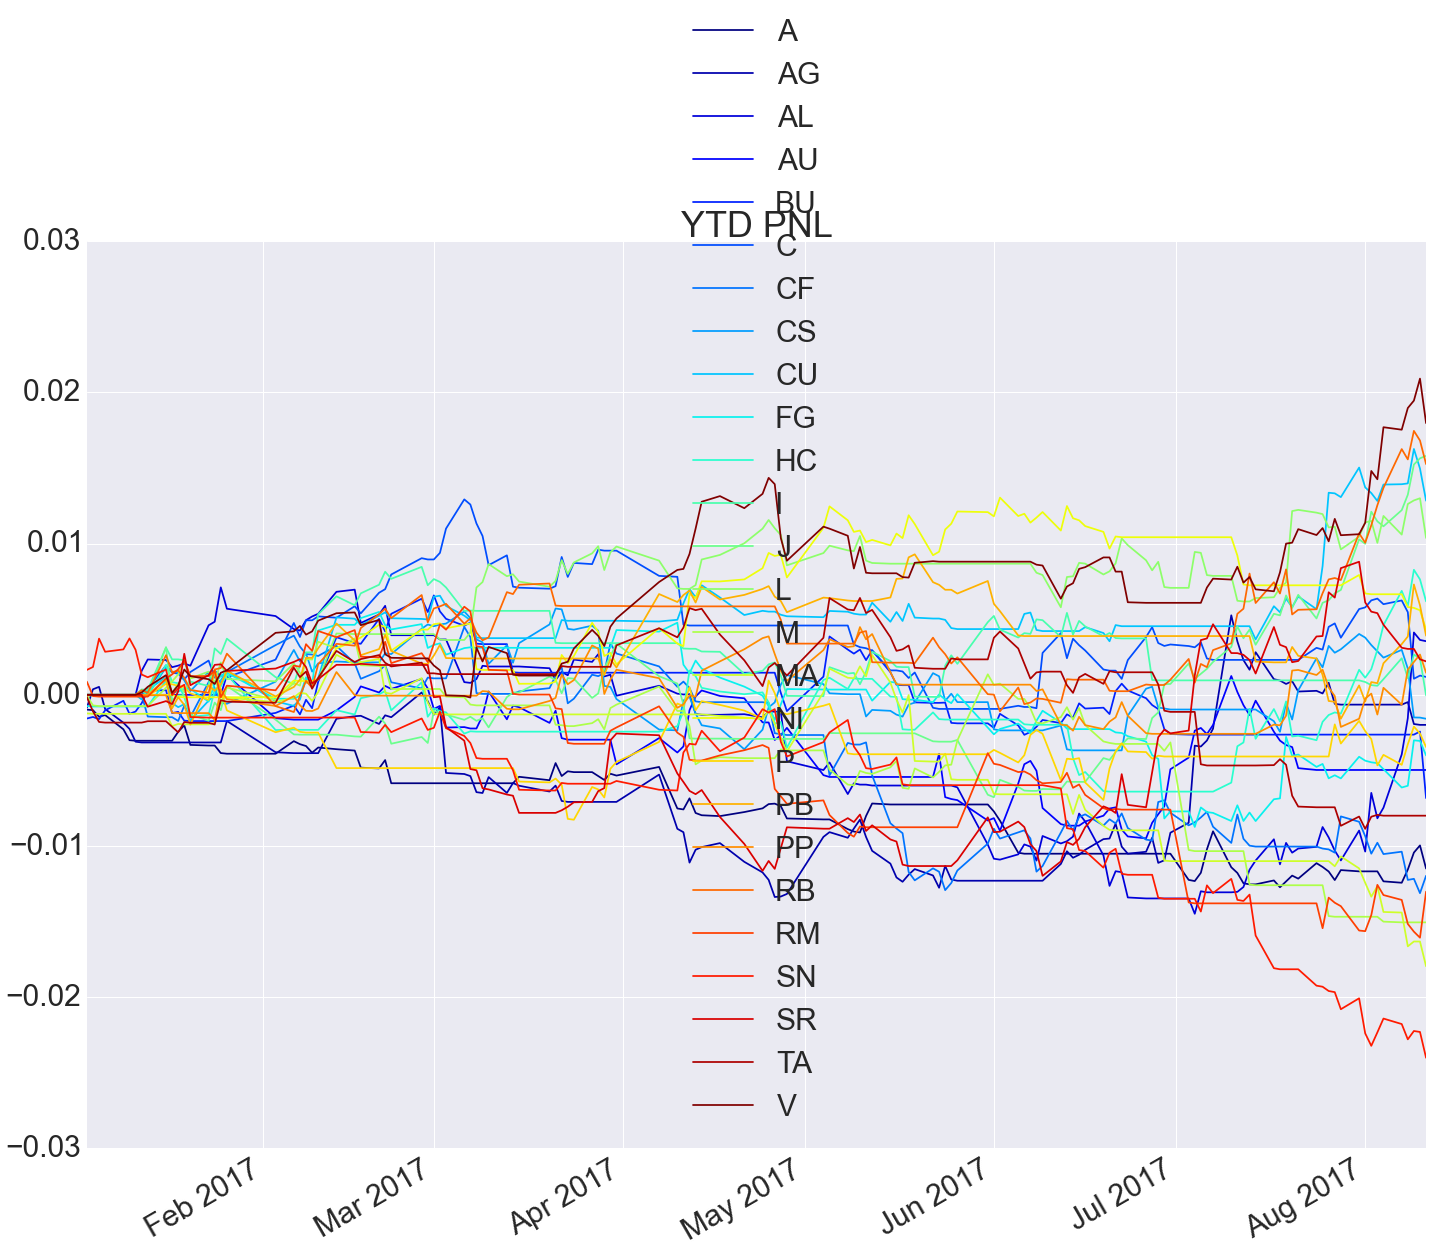

In [124]:
(PNL['2017':].dropna(how='all').ffill()/FundAUM).cumsum().plot(colormap='jet',title='YTD PNL')

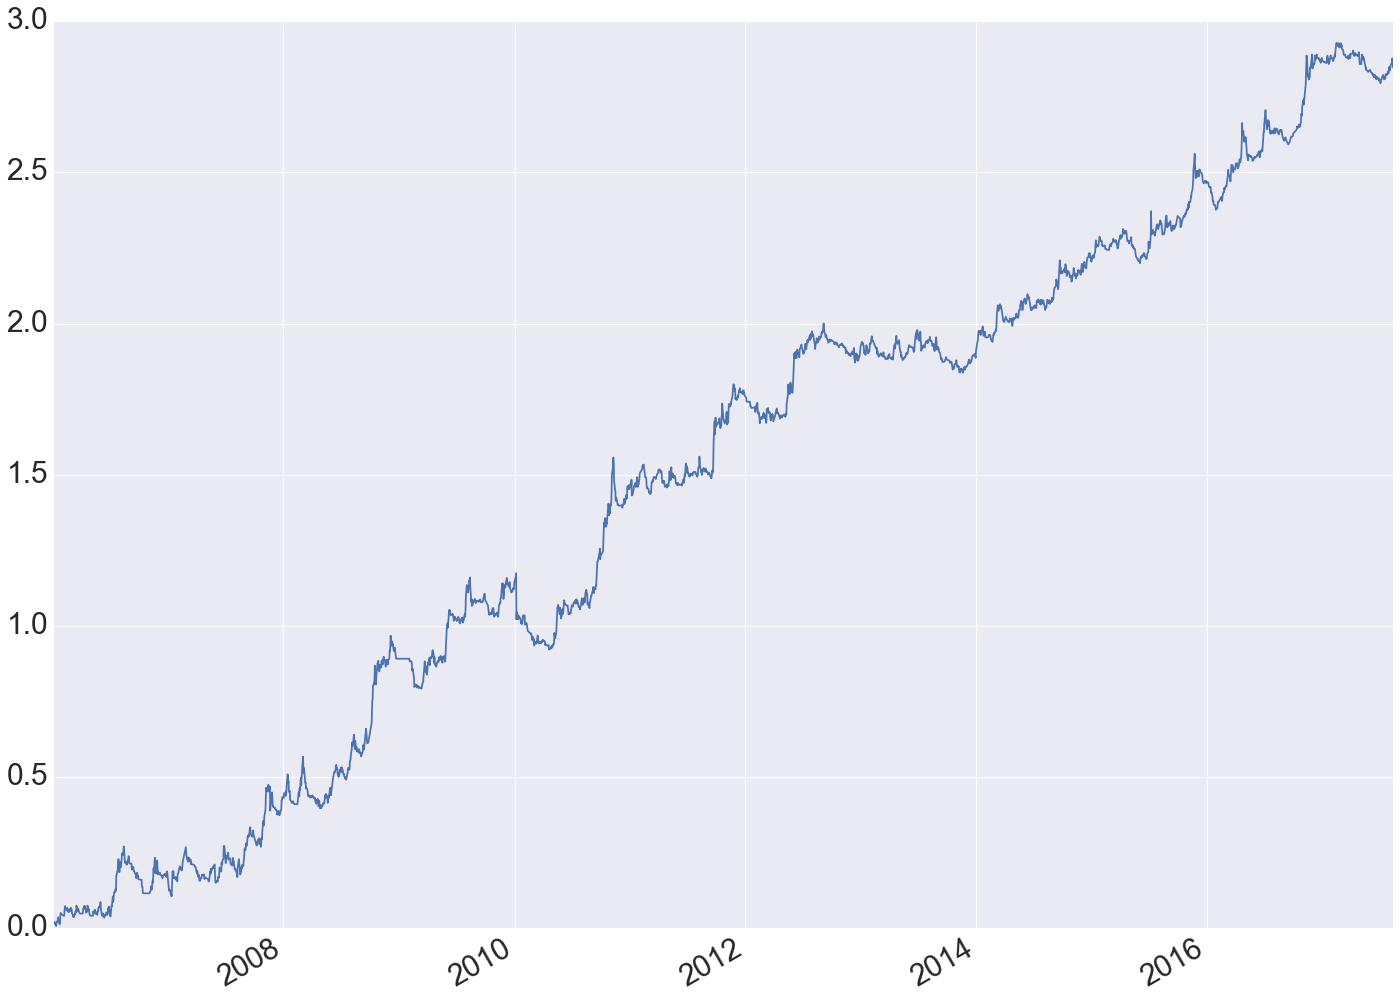

In [125]:
(PNL.sum(axis=1)/FundAUM)['2006':].cumsum().plot()

In [ ]:
calc_Sharpe((PNL['2014':].sum(axis=1)/FundAUM))

1.4818655342751232

In [ ]:
mkt = 'A'
OI=load_market_open_interest(mkt).dropna(how='all')

In [76]:
def switch_contracts(lots):
    msg =""    
    for mkt in lots.columns:
        OI=load_market_open_interest(mkt).dropna(how='all')
        if OI.size==0:
            continue
        prev_contract = OI.idxmax(axis=1).tail(2).ix[0] 
        today_contract = OI.idxmax(axis=1).tail(2).ix[1]
        if prev_contract != today_contract:
            prev = lots[mkt].tail(2).ix[0]
            today = lots[mkt].tail(2).ix[1]
            msg=msg+ 'SWITCH: ' +str(prev) + ' lots of '  +mkt + ' from: ' + prev_contract + ' to: ' + today_contract +'\n'
    return msg

In [61]:
switch_contracts(lots)

''

In [102]:
def generate_trades(lots):
    trades=lots.diff().ix[lots.index[-1]].dropna()
    for mkt in trades.index:
        contract = get_traded_contract(mkt)
        td =int(trades[mkt]) 
        if  td >0:
            print 'BUY: ' + str(trades[mkt]) + ' of ' + mkt + ' '+ contract
        elif td==0:
            continue
        else:
            print 'SELL: ' + str(trades[mkt]) + ' of ' + mkt + ' '+ contract

In [60]:
generate_trades(lots)

BUY: 156.0 of A F18
SELL: -45.0 of AG M18
BUY: 15.0 of AL X17
SELL: -5.0 of AU Z17
BUY: 311.0 of BU Z17
BUY: 229.0 of C F18
BUY: 105.0 of CS F18
BUY: 55.0 of HC F18
BUY: 78.0 of I F18
BUY: 8.0 of J F18
BUY: 129.0 of L F18
BUY: 5678.0 of M F18
BUY: 44.0 of NI F18
SELL: -3196.0 of P F18
BUY: 98.0 of PP F18
BUY: 56.0 of RB F18
SELL: -1399.0 of SN U17
BUY: 132.0 of V F18


In [108]:
calc_positions_two_lookbacks?

In [56]:
get_market_static_data().T.SR

contract_multiplier             10
exchange                      CZCE
margin_rate                   0.05
product                  Commodity
settlement_method          UNKNOWN
symbol                         白砂�
trading_unit                  null
Description            White Sugar
Name: SR, dtype: object

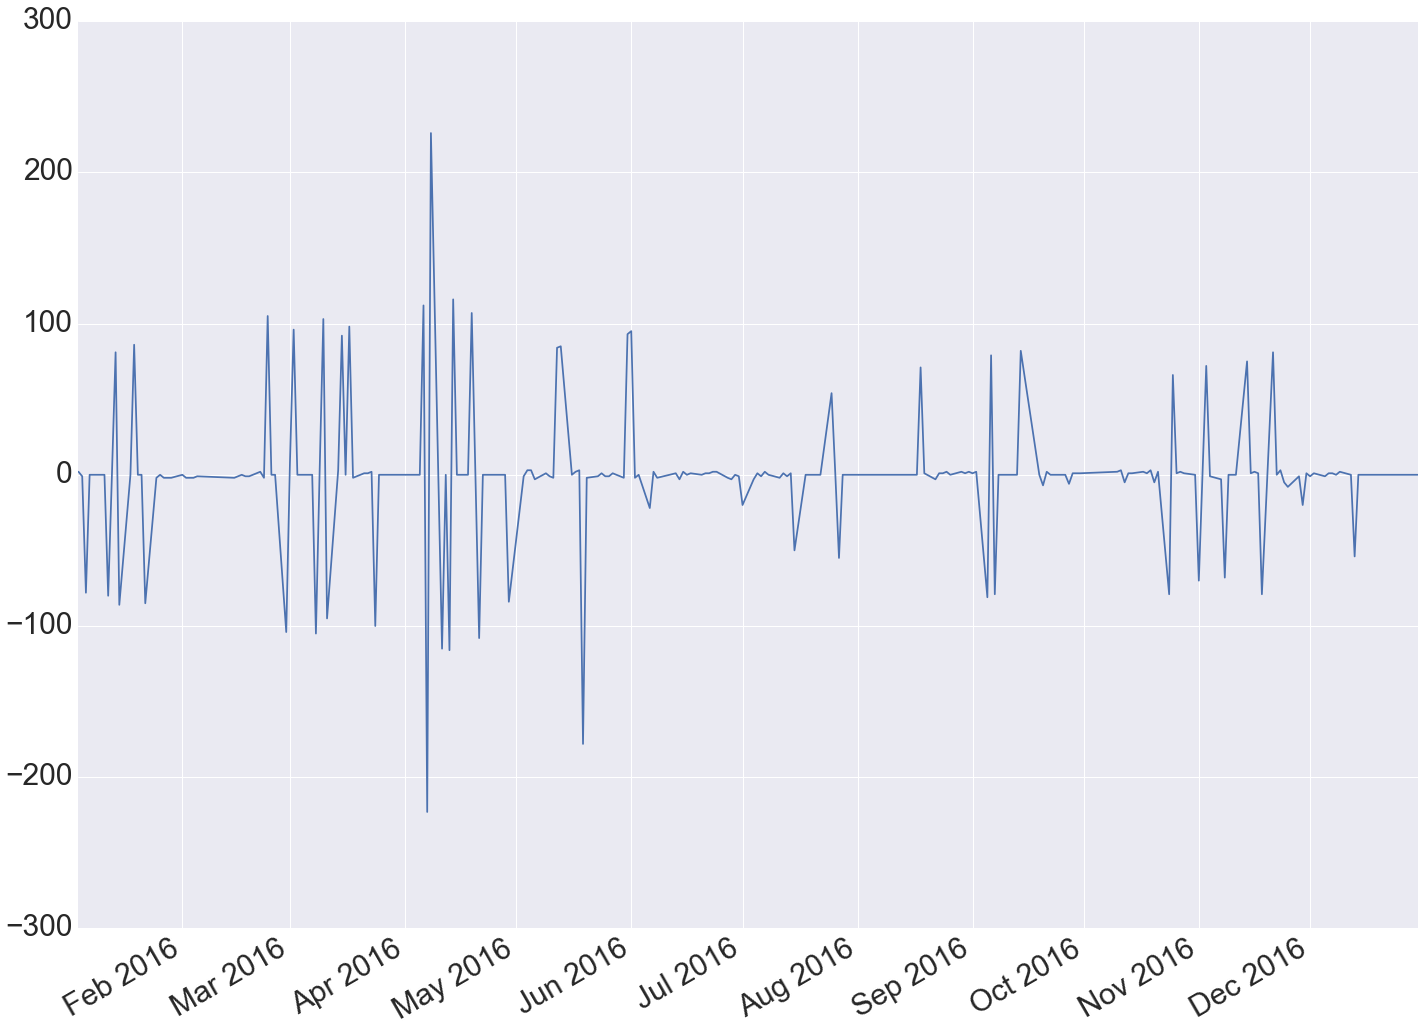

In [121]:
lots.diff()['2016'].SR.plot()

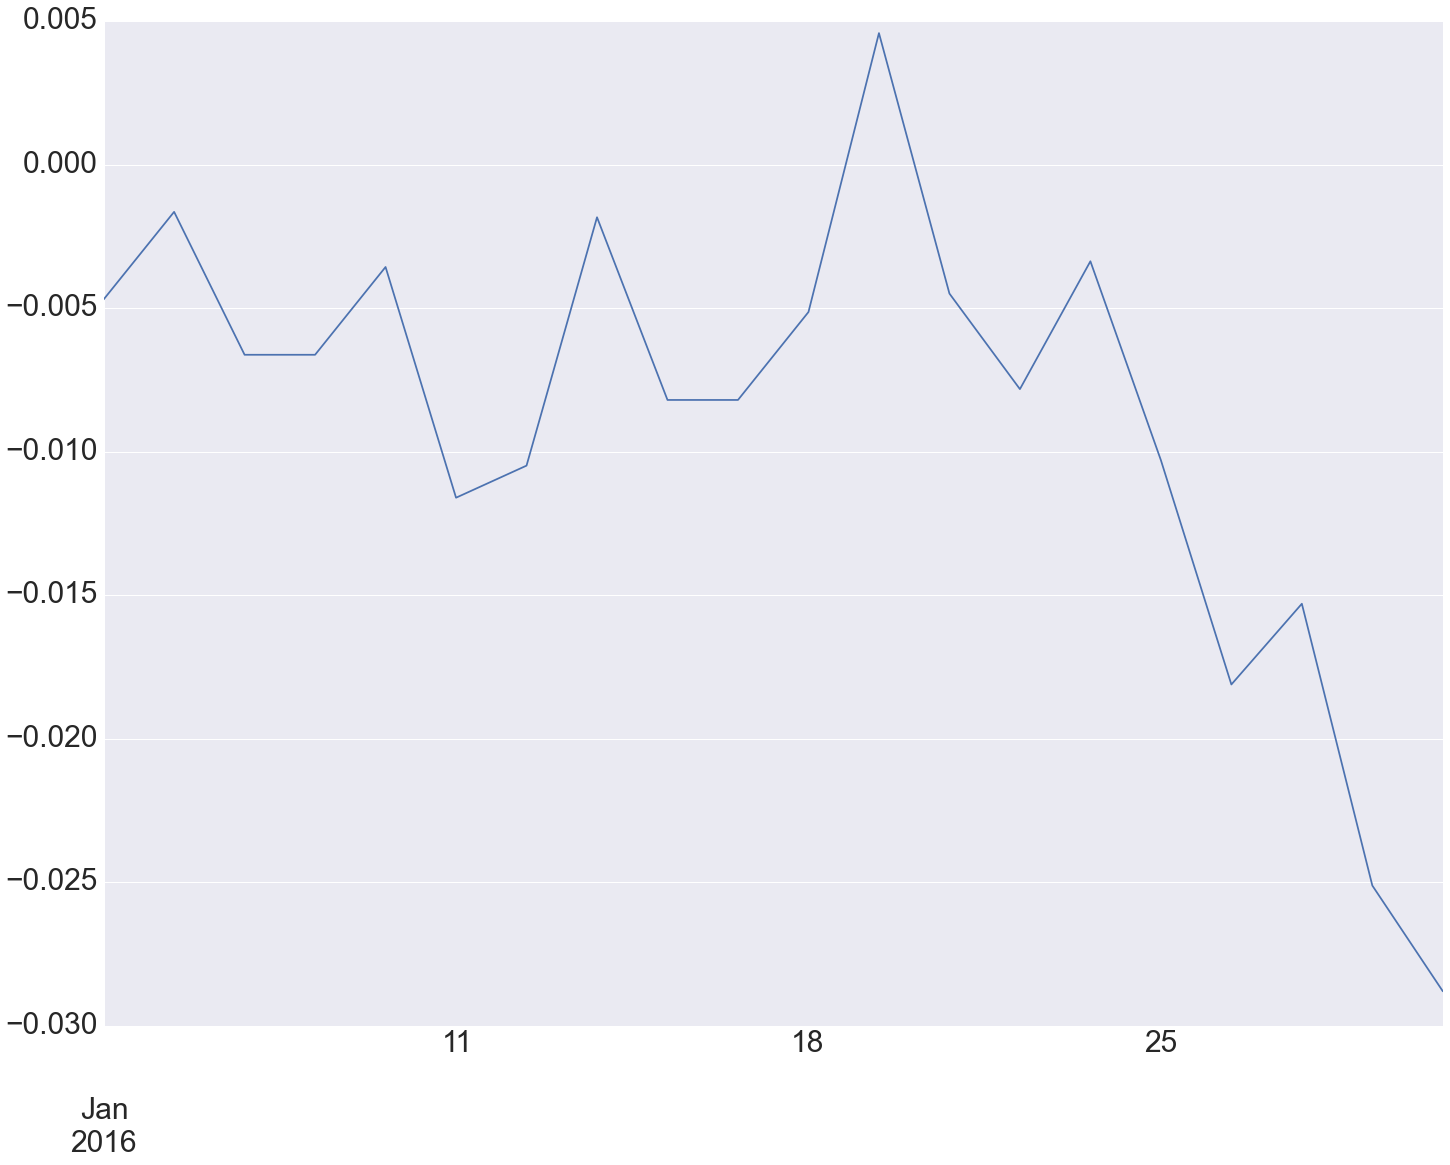

In [19]:
df.A['2016-1'].cumsum().plot()

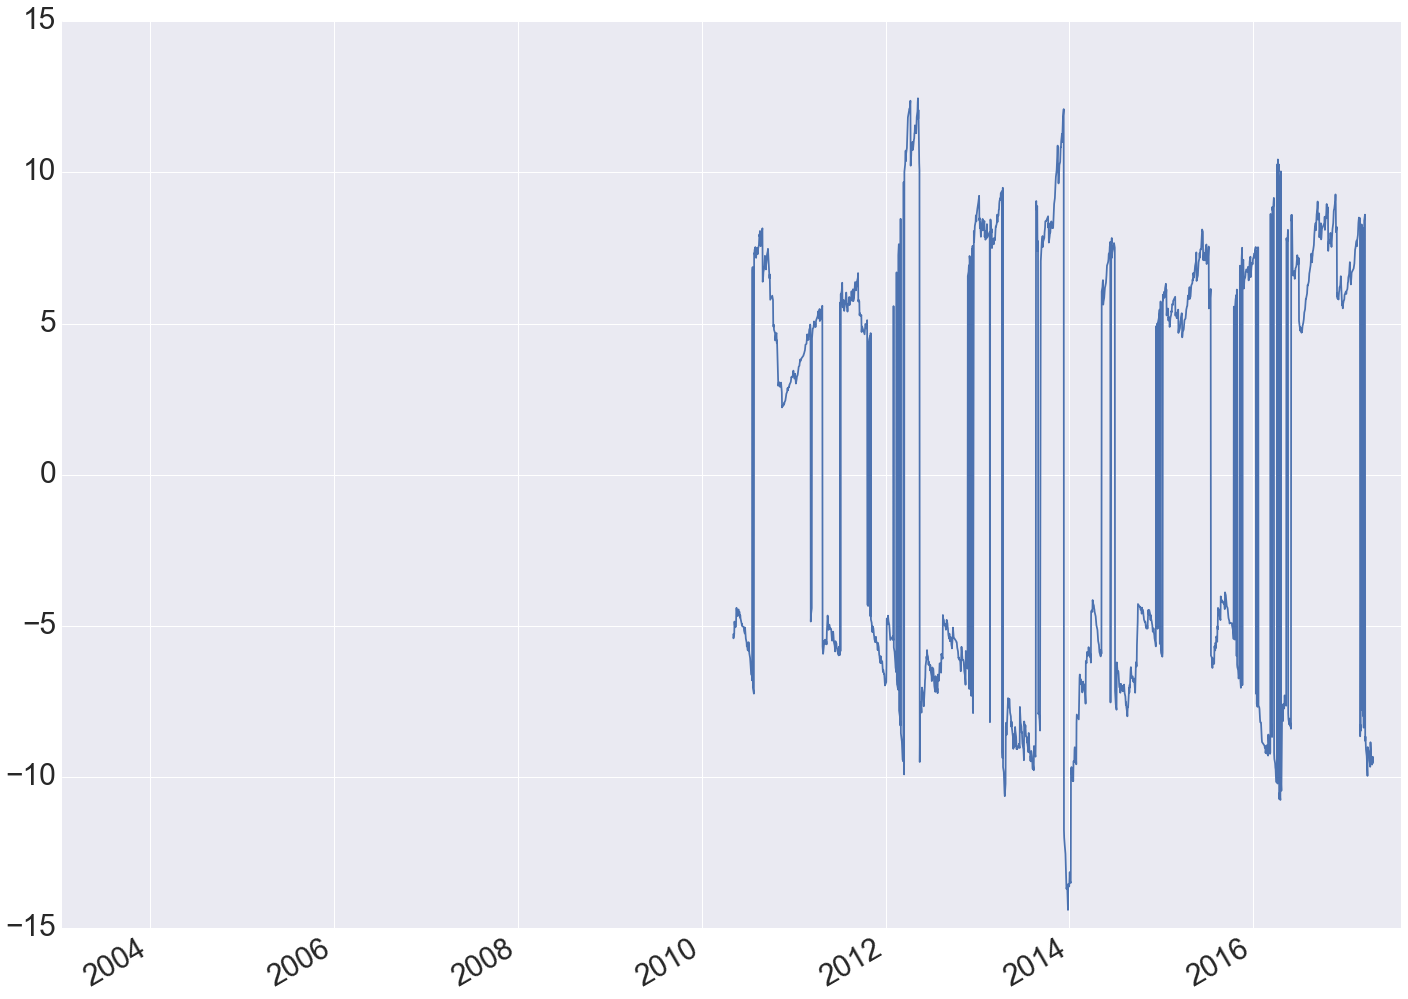

In [71]:
s_long.SR.plot()

# Testing email server

In [17]:
# Import smtplib for the actual sending function
import smtplib

In [34]:
server = smtplib.SMTP('smtp.live.com', 587)
server.starttls()
server.ehlo()


(250,
 'BLU436-SMTP59.smtp.hotmail.com Hello [90.197.67.53]\nTURN\nSIZE 41943040\nETRN\nPIPELINING\nDSN\nENHANCEDSTATUSCODES\n8bitmime\nBINARYMIME\nCHUNKING\nVRFY\nAUTH LOGIN PLAIN XOAUTH2\nOK')

In [ ]:
# Import the email modules we'll need
from email.mime.text import MIMEText

In [13]:
# Import smtplib for the actual sending function
import smtplib

# Import the email modules we'll need
from email.mime.text import MIMEText

textfile='model.py'
me='mrefermat@hotmail.com'
you=me

# Open a plain text file for reading.  For this example, assume that
# the text file contains only ASCII characters.
fp = open(textfile, 'rb')
# Create a text/plain message
msg = MIMEText(fp.read())
fp.close()

# me == the sender's email address
# you == the recipient's email address
msg['Subject'] = 'The contents of %s' % textfile
msg['From'] = me
msg['To'] = you

# Send the message via our own SMTP server, but don't include the
# envelope header.
s = smtplib.SMTP('localhost')
s.sendmail(me, [you], msg.as_string())
s.quit()

error: [Errno 61] Connection refused

In [120]:
load_market_price('SR')

,K13,K12,K11,K10,K17,K16,K15,K14,X11,U11,...,F15,N12,N13,N10,N11,N16,N17,N14,N15,F10
index,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,5409.0,5628.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5735.0,NaN,NaN,NaN,NaN,NaN,5400.0
2010-01-05,NaN,NaN,5375.0,5656.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5750.0,NaN,NaN,NaN,NaN,NaN,5515.0
2010-01-06,NaN,NaN,5564.0,5666.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5761.0,NaN,NaN,NaN,NaN,NaN,5480.0
2010-01-07,NaN,NaN,5642.0,5534.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5630.0,NaN,NaN,NaN,NaN,NaN,5381.0
2010-01-08,NaN,NaN,5471.0,5345.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5431.0,NaN,NaN,NaN,NaN,NaN,5213.0
2010-01-11,NaN,NaN,5529.0,5353.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5455.0,NaN,NaN,NaN,NaN,NaN,5185.0
2010-01-12,NaN,NaN,5447.0,5289.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5387.0,NaN,NaN,NaN,NaN,NaN,5150.0
2010-01-13,NaN,NaN,5254.0,5117.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5224.0,NaN,NaN,NaN,NaN,NaN,4984.0
2010-01-14,NaN,NaN,5279.0,5192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5303.0,NaN,NaN,NaN,NaN,NaN,5025.0
